## Data Preparation

In [1]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Mengimpor dataset
dataset = pd.read_excel('3SI1_Dataset 03_Gejala Ikutan Vaksin.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sex                          449 non-null    object
 1   Age                          449 non-null    object
 2   Professions                  449 non-null    object
 3   Education                    447 non-null    object
 4   Living Area                  449 non-null    object
 5   1. Swelling                  448 non-null    object
 6   2. Redness                   448 non-null    object
 7   3. Itching                   449 non-null    object
 8   4. Fever                     449 non-null    object
 9   5. Headache                  449 non-null    object
 10  6. Muscle Pain               448 non-null    object
 11  7. Tiredness                 448 non-null    object
 12  8. Coughing                  449 non-null    object
 13  9. Diarrhea                  449 no

### Periksa Data

In [3]:
dataset.keys()

Index(['Sex', 'Age', 'Professions', 'Education', 'Living Area', '1. Swelling',
       '2. Redness', '3. Itching', '4. Fever', '5. Headache', '6. Muscle Pain',
       '7. Tiredness', '8. Coughing', '9. Diarrhea', '10. Nausea and vomiting',
       '11. Breathlessness', '12. Joint Pain', '13. Fainted',
       '14. Anaphylactic Reaction', '15. Tingling', '16. Swollen Lymph Nodes',
       'TARGET LABEL (SYMPTOM TIME)'],
      dtype='object')

In [4]:
dataset.describe

<bound method NDFrame.describe of         Sex          Age         Professions           Education Living Area  \
0      Male  51-55 years  Medical specialist       Master degree    Downtown   
1    Female  41-45 years   Non medical staff       Master degree    Downtown   
2      Male  56-60 years      Medical doctor                 NaN    Downtown   
3      Male  26-30 years   Non medical staff                 NaN    Downtown   
4    Female  31-35 years      Medical doctor     Bachelor degree    Downtown   
..      ...          ...                 ...                 ...         ...   
444  Female  36-40 years             Midwife     Bachelor degree    Downtown   
445  Female  46-50 years   Non medical staff     Bachelor degree    Outskirt   
446  Female  36-40 years               Nurse     Bachelor degree    Downtown   
447  Female  41-45 years   Non medical staff     Bachelor degree    Downtown   
448  Female  36-40 years   Non medical staff  Senior high school    Downtown   

    1

In [5]:
np.sum(pd.isnull(dataset).sum()) # Sum of the count of null objects in all columns of data frame

8

In [6]:
dataset = dataset.dropna()
dataset = dataset.drop(columns=['3. Itching'])
dataset = dataset.drop(columns=['13. Fainted'])

In [7]:
dataset.head()

,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,4. Fever,5. Headache,6. Muscle Pain,7. Tiredness,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes,TARGET LABEL (SYMPTOM TIME)
0,Male,51-55 years,Medical specialist,Master degree,Downtown,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,None
1,Female,41-45 years,Non medical staff,Master degree,Downtown,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,None
4,Female,31-35 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,< 24 hours
6,Female,46-50 years,Medical doctor,Bachelor degree,Downtown,No,No,No,No,No,No,No,No,No,No,No,No,No,No,None
7,Female,56-60 years,Medical doctor,Master degree,Downtown,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,None


## Exploratory Data Analysis


Periksa Data apakah data Purchased tersebar secara merata atau imbalance 

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in dataset.columns:
  dataset[x] = le.fit_transform(dataset[x])

dataset.head(10)

,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,4. Fever,5. Headache,6. Muscle Pain,7. Tiredness,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes,TARGET LABEL (SYMPTOM TIME)
0,1,6,1,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3
1,0,4,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
4,0,2,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1
6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
7,0,7,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3
8,0,3,3,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
9,1,6,4,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
10,0,7,4,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
11,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


<AxesSubplot:xlabel='TARGET LABEL (SYMPTOM TIME)', ylabel='count'>

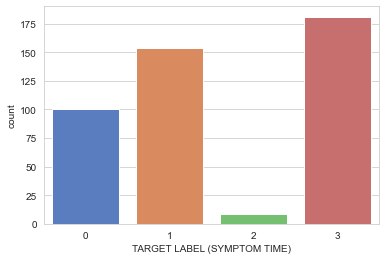

In [9]:
sns.set_style('whitegrid')
sns.countplot(x=dataset['TARGET LABEL (SYMPTOM TIME)'],data=dataset,palette='muted')

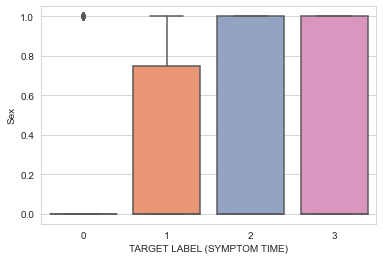

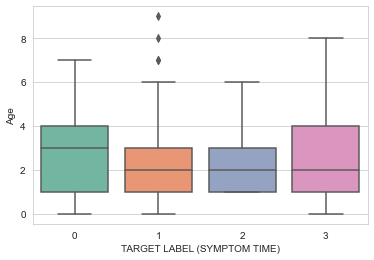

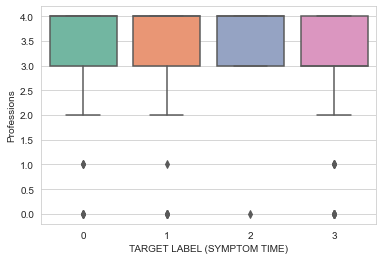

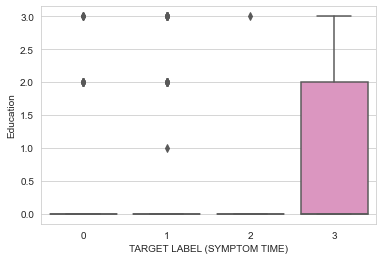

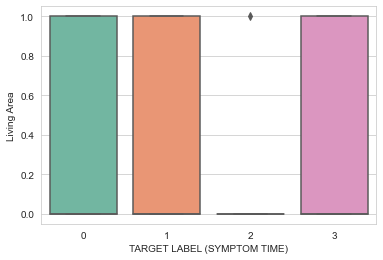

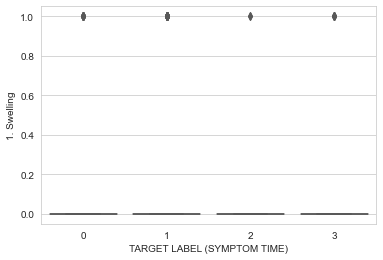

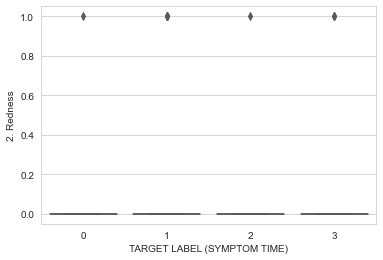

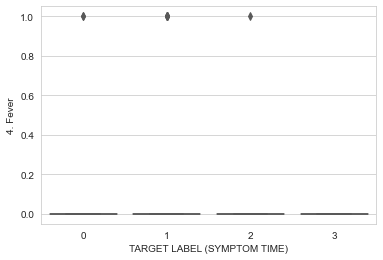

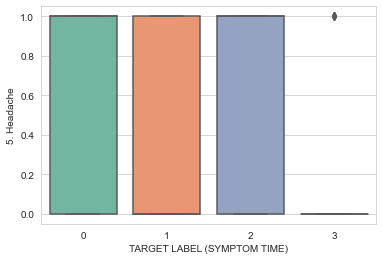

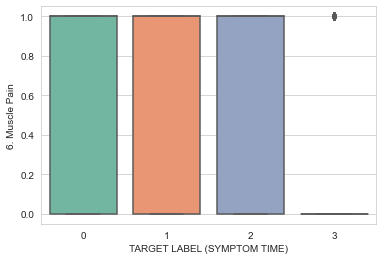

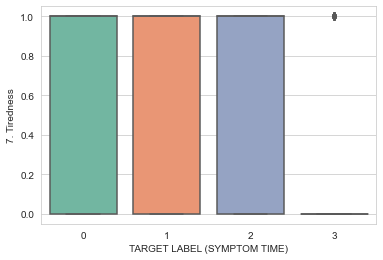

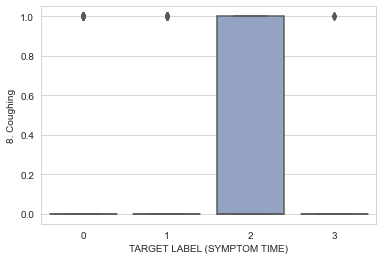

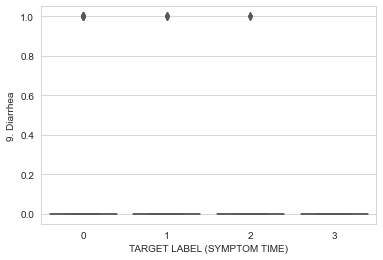

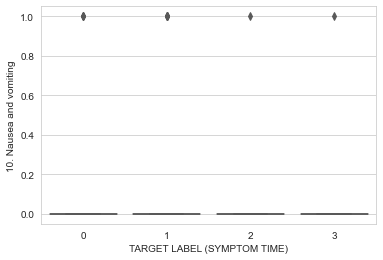

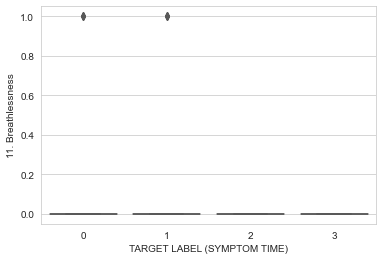

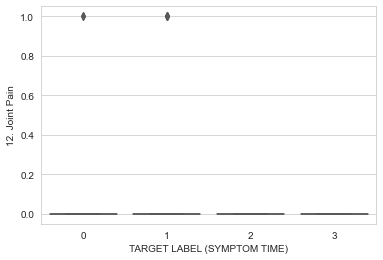

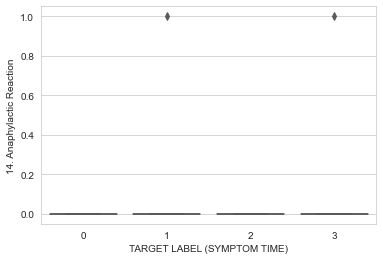

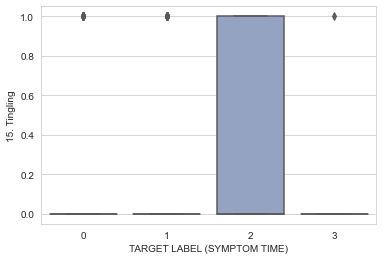

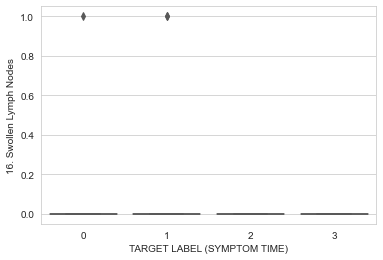

<Figure size 432x288 with 0 Axes>

In [10]:
l=list(dataset.columns[0:20])
for i in range(len(l)-1):
    sns.boxplot(x='TARGET LABEL (SYMPTOM TIME)',y=l[i], data=dataset, palette='Set2')
    plt.figure()

## Membangun Model Random Forest

In [11]:
# Pemilihan Fitur
X = dataset.drop(columns='TARGET LABEL (SYMPTOM TIME)')
y = dataset['TARGET LABEL (SYMPTOM TIME)']

In [12]:
# Menjadi dataset ke dalam Training set dan Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_test

,Sex,Age,Professions,Education,Living Area,1. Swelling,2. Redness,4. Fever,5. Headache,6. Muscle Pain,7. Tiredness,8. Coughing,9. Diarrhea,10. Nausea and vomiting,11. Breathlessness,12. Joint Pain,14. Anaphylactic Reaction,15. Tingling,16. Swollen Lymph Nodes
332,0,1,4,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
238,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
127,0,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
107,0,2,3,3,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0
76,0,7,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1,0,3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
195,0,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
431,0,2,4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
140,0,2,4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.62186715,  3.25671226, -3.17085659, ..., -0.07527099,
        -0.33593551, -0.07527099],
       [ 1.6080605 , -0.86497349,  0.7006966 , ..., -0.07527099,
        -0.33593551, -0.07527099],
       [-0.62186715,  1.19586939,  0.7006966 , ..., -0.07527099,
        -0.33593551, -0.07527099],
       ...,
       [-0.62186715,  0.68065867,  0.7006966 , ..., -0.07527099,
        -0.33593551, -0.07527099],
       [-0.62186715,  1.7110801 , -0.2671917 , ..., -0.07527099,
        -0.33593551, -0.07527099],
       [-0.62186715,  0.16544795,  0.7006966 , ..., -0.07527099,
        -0.33593551, -0.07527099]])

In [14]:
# Membuat model Random Forest Classification terhadap Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [15]:
# Memprediksi hasil test set
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 3, 1, 3, 0, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 3, 1, 0, 1, 0, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 1, 1, 1, 1, 0, 3, 3, 1, 3, 1, 3, 1, 0, 3, 3, 3, 1, 3, 1, 0,
       3])

In [16]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 6,  9,  0,  4],
       [ 5, 13,  0, 16],
       [ 0,  2,  0,  1],
       [ 0,  7,  0, 26]], dtype=int64)

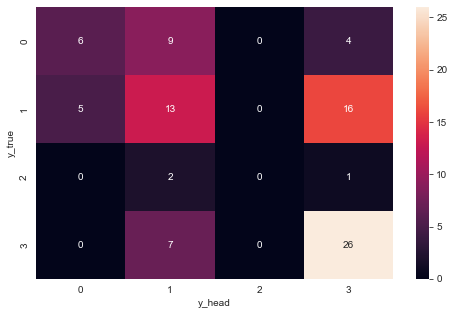

In [17]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [18]:
# Akurasi dari RandomForest

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.32      0.40        19
           1       0.42      0.38      0.40        34
           2       0.00      0.00      0.00         3
           3       0.55      0.79      0.65        33

    accuracy                           0.51        89
   macro avg       0.38      0.37      0.36        89
weighted avg       0.48      0.51      0.48        89



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
